In [50]:
import pandas as pd
import networkx as nx
import itertools
import csv
import pydot
from IPython.display import Image

In [55]:
def networkx2dot(G):
    strict = nx.number_of_selfloops(G) == 0 and not G.is_multigraph()
    GDOT = pydot.Dot("OKRMAP", graph_type="digraph", strict=strict) #rankdir="LR"
    GDOT.graph_defaults = G.graph.get("graph", {})
    GDOT.set_node_defaults(shape='box', style="filled", color="black", fillcolor="white", fontname='helvetica')
    GDOT.set_edge_defaults(fontname='helvetica', labelfontsize='10.0')
    
    for n, nodedata in G.nodes(data=True):
        if n !=None:
            node_lst = list(nodedata.values())
            node_dict = str(node_lst[0])
            node_label = str(n)+'\n'+node_dict
            dotnode = pydot.Node(n, label = node_label)
            GDOT.add_node(dotnode)

    for u, y, edgedata in G.edges(data=True):
        if y !=None:
            edge_lst = list(edgedata.values())
            edge_label = str(edge_lst[0])
            dotedge = pydot.Edge(str(u), str(y), label = edge_label)
            GDOT.add_edge(dotedge)
    return GDOT

In [56]:
df = pd.read_csv(r"D:\Code\TFBOKRMAP\okrlist\rdtest111e.csv", usecols = ['Number','Title', 'statement']) 
df2 = df.drop(['statement'], axis='columns')
df3 = df.drop(['Title'], axis='columns')
display(df)
print()

,Number,Title,statement
0,1000,Earn 1000 dollars,1000
1,1100,Earned by jobs for 500,500
2,1110,Working 22 day,22
3,1120,Good performance,TRUE
4,1200,Earned by part-time for 200,200
5,1210,Find 2 prat-time jobs,2
6,1220,Working 4 weekend-day,4
7,1300,Earned by donate for 300,300
8,1310,Open Stream 8 night,8
9,1320,Clear game,TRUE


In [57]:
import networkx as nx

G = nx.DiGraph() #rankdir="LR"
#Setting Nodes and Node Attributes 
G.add_nodes_from(df['Number'])
print(G.nodes)

node_label = df2.set_index('Number').to_dict('index')
print(node_label)
nx.set_node_attributes(G, node_label)

print(G.nodes(data=True))
G.nodes[1000]["Title"]

[1000, 1100, 1110, 1120, 1200, 1210, 1220, 1300, 1310, 1320]
{1000: {'Title': 'Earn 1000 dollars'}, 1100: {'Title': 'Earned by jobs for 500'}, 1110: {'Title': 'Working 22 day'}, 1120: {'Title': 'Good performance'}, 1200: {'Title': 'Earned by part-time for 200'}, 1210: {'Title': 'Find 2 prat-time jobs'}, 1220: {'Title': 'Working 4 weekend-day'}, 1300: {'Title': 'Earned by donate for 300'}, 1310: {'Title': 'Open Stream 8 night'}, 1320: {'Title': 'Clear game'}}
[(1000, {'Title': 'Earn 1000 dollars'}), (1100, {'Title': 'Earned by jobs for 500'}), (1110, {'Title': 'Working 22 day'}), (1120, {'Title': 'Good performance'}), (1200, {'Title': 'Earned by part-time for 200'}), (1210, {'Title': 'Find 2 prat-time jobs'}), (1220, {'Title': 'Working 4 weekend-day'}), (1300, {'Title': 'Earned by donate for 300'}), (1310, {'Title': 'Open Stream 8 night'}), (1320, {'Title': 'Clear game'})]


'Earn 1000 dollars'

In [36]:
#Setting Edges and Edge Attributes
#Build Edge List
#import pprint
#edge_list=[]
#for i in range(1000,5901):
#  a=i//1000
#  b=(i%1000)//100
#  c=(i%100)//10
#  d=i%10
#  if b!=0:
#    if c!=0:
#      edge_list.append(i)
#    else:
#      if d==0:
#        edge_list.append(i)
#  else:
#    if c==0 and d==0:
#      edge_list.append(i)
#pprint.pprint(edge_list, depth=1, width=10000)
#這段好像沒有用.....87

In [58]:
#Build Edge List2
#
#讀取參照的edge結構
with open('number_logic.csv', newline='') as f:
    reader = csv.reader(f)
    number_logic = [tuple(map(int, row)) for row in reader]
#print(number_logic)
#
edge_list=[i for i in df['Number']] #把df裡面的節點抓成list
#print(edge_list)
edge_raw = [i for i in itertools.combinations(edge_list, 2)] #把df裡面的節點組合成edge tuple的list
#print(edge_raw)
edge1 = [x for x in edge_raw if x in number_logic] #比對edge_raw跟number_logic然後挑選集合部分做出新list
#print(edge1)

df_e = pd.DataFrame(edge1, columns = ['f_node', 'b_node'])
label_dict = dict(zip(df3['Number'], df3['statement']))
#print(label_dict)
df_e['label'] = df_e['b_node'].map(label_dict)

edge2 = [[*i, j] for i,j in zip(list(df_e[['f_node', 'b_node']].itertuples(index=False, name=None)), df_e.drop(['f_node', 'b_node'], axis='columns').to_dict('records'))] 
#print(edge2)

#把Statement作為tuple的第三個常數丟給edge
edges = [tuple(l) for l in edge2] #把上一步list裡面的元素轉回tuple...麻煩

print(edges)
G.add_edges_from(edges)
print(G.edges(data=True))

[(1000, 1100, {'label': '500'}), (1000, 1200, {'label': '200'}), (1000, 1300, {'label': '300'}), (1100, 1110, {'label': '22'}), (1100, 1120, {'label': 'TRUE'}), (1200, 1210, {'label': '2'}), (1200, 1220, {'label': '4'}), (1300, 1310, {'label': '8'}), (1300, 1320, {'label': 'TRUE'})]
[(1000, 1100, {'label': '500'}), (1000, 1200, {'label': '200'}), (1000, 1300, {'label': '300'}), (1100, 1110, {'label': '22'}), (1100, 1120, {'label': 'TRUE'}), (1200, 1210, {'label': '2'}), (1200, 1220, {'label': '4'}), (1300, 1310, {'label': '8'}), (1300, 1320, {'label': 'TRUE'})]


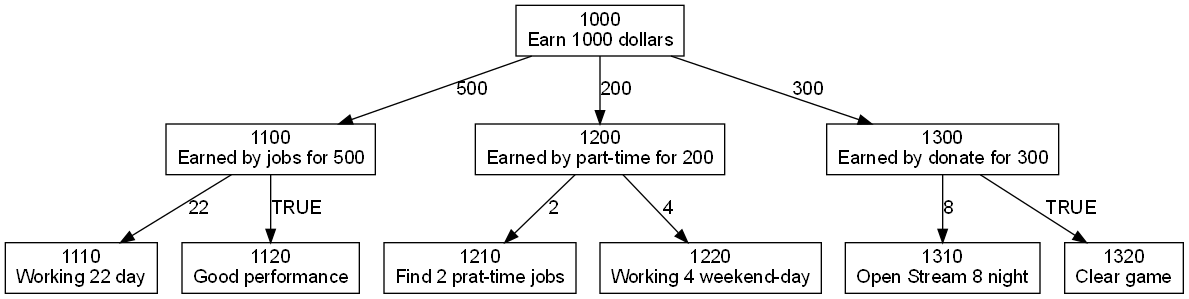

In [59]:
#使用Graphviz繪圖
GDOT = networkx2dot(G)
GDOT.write_png('tmp.png')
Image('tmp.png')
